In [100]:
!pip install torch
!pip install torchvision

In [101]:
import numpy as np
import pandas as pd
import torch
import torchvision
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader,Dataset
from torchvision import datasets , transforms
from typing import Dict ,List,Tuple
import pathlib as Path


import os
import random
from PIL import Image

from google.colab import files


In [102]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cpu


In [103]:
from pathlib import Path
path = Path("/content/archive (4).zip")
if os.path.exists(path):
  print(True)
else:
  print(False)

True


In [104]:
train_data = path/"Soil Train/Soil Train"
train_data_Alluvial_Soil = path/"Soil Train/Soil Train"/"Alluvial Soil"
train_data_Black_Soil = path/"Soil Train/Soil Train"/"Black Soil"
train_data_Clay_Soil = path/"Soil Train/Soil Train"/"Clay Soil"
train_data_Red_Soil = path/"Soil Train/Soil Train"/"Red Soil"


test_data = path /"Soil Test/Soil Test"
test_data_Alluvial_Soil = path/"Soil Test/Soil Test"/"Alluvial Soil"
test_data_Black_Soil = path/"Soil Test/Soil Test"/"Black Soil"
test_data_Clay_Soil = path/"Soil Test/Soil Test"/"Clay Soil"
test_data_Red_Soil = path/"Soil Test/Soil Test"/"Red Soil"

In [105]:
print(path)
print(path.exists())

/content/archive (4).zip
True


In [106]:
new_path=Path("/content/soil_data")
import zipfile
with zipfile.ZipFile(path , "r" ) as zip:
  zip.extractall(new_path)


In [107]:
print(os.listdir("/content/soil_data"))

['Soil Test', 'Soil Train']


In [108]:
new_path = path("/content/soil_data")
new_soil_train=new_path /"Soil Train/Soil Train"
new_train_alluvial_soil=new_soil_train/"Alluvial Soil"
new_train_black_soil=new_soil_train/"Black Soil"
new_train_clay_soil=new_soil_train/"Clay Soil"
new_train_red_soil=new_soil_train/"Red Soil"

new_soil_test = new_path /"Soil Test/Soil Test"
new_test_alluvial_soil=new_soil_test/"Alluvial Soil"
new_test_black_soil=new_soil_test/"Black Soil"
new_test_clay_soil=new_soil_test/"Clay Soil"
new_test_red_soil=new_soil_test/"Red Soil"

TypeError: 'PosixPath' object is not callable

In [109]:
train_data = new_path /"Soil Train/Soil Train"
test_data = new_path /"Soil Test/Soil Test"

In [110]:
def walk_through_os(dir_path):
  for dir_path ,dir_names , file_names ,  in os.walk(dir_path):
    print(f"There are {len(dir_names)} directories and {len(file_names)} images in '{dir_path}'.")

In [64]:
print(len(os.listdir(new_path /"Soil Train"/"Soil Train"/"Red Soil")))

60


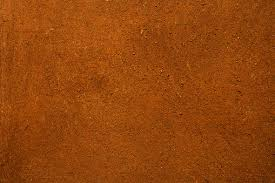

In [111]:
import random
from PIL import Image
random.seed(42)
image_path_list = list(train_data.glob("*/*.jpg"))
random_path = random.choice(image_path_list)
img = Image.open(random_path)
img



In [112]:
test_path = new_path / "Soil Test/Soil Test"
print([f.name for f in test_path.iterdir() if f.is_dir()])


['Red Soil', 'Cinder Soil', 'Black Soil', 'Alluvial Soil']


In [113]:
print(f"image path :{random_path}")
print(f"image height :{img.height}")
print(f"image width :{img.width}")
print(f"image class :{random_path.parent.stem}")



image path :/content/soil_data/Soil Train/Soil Train/Red Soil/21.jpg
image height :183
image width :275
image class :Red Soil


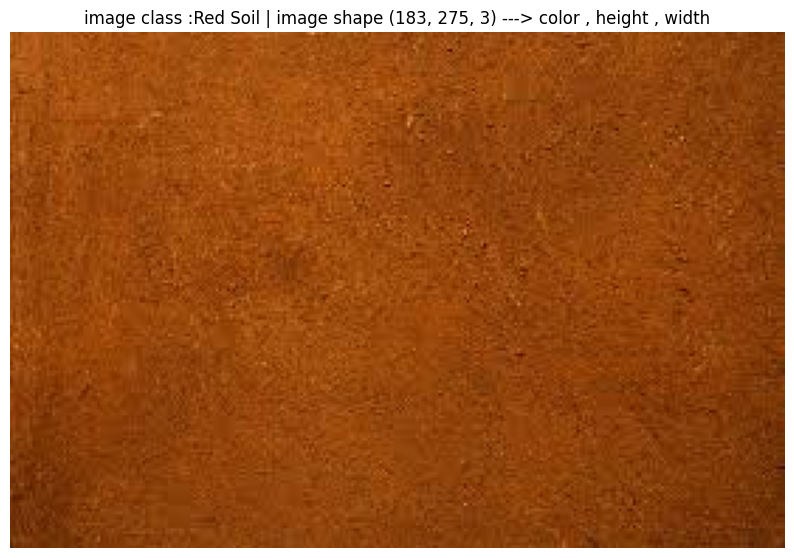

In [114]:
img_as_array = np.asarray(img)
plt.figure(figsize=(10,7))
plt.imshow(img_as_array)
plt.title(f"image class :{random_path.parent.stem} | image shape {img_as_array.shape} ---> color , height , width")
plt.axis(False);

In [115]:
data_transform = transforms.Compose([
    transforms.Resize(size=(64,64)) ,
    transforms.RandomHorizontalFlip(0.5),
    transforms.ToTensor()])


In [116]:
def plot_transformed_image(image_path , transform , n=3 , seed=32):
  random.seed(seed)
  random_image_path = random.sample(image_path , k=n)
  for image_path in random_image_path:
    with Image.open(image_path) as f:
      fig , ax = plt.subplots(1,2)
      transformed_image=transform(f).permute9(1 ,2,0)
      ax[0].imshow(transformed_image)



In [117]:
train_path = datasets.ImageFolder(root = train_data , transform=data_transform , target_transform = None)
test_path = datasets.ImageFolder(root = test_data , transform=data_transform )


In [118]:
print(f"train data : {len(train_path)} || test_data : {len(test_path)}")


train data : 295 || test_data : 73


In [119]:
class_name = train_path.classes
class_name

['Alluvial Soil', 'Black Soil', 'Cinder Soil', 'Red Soil']

In [120]:
train_dataloader = DataLoader(dataset=train_path , batch_size = 10 , shuffle=True , num_workers=os.cpu_count())
test_dataloader = DataLoader(dataset=test_path , batch_size = 10 , shuffle=False , num_workers=os.cpu_count())
train_dataloader , test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7f7d76268b10>,
 <torch.utils.data.dataloader.DataLoader at 0x7f7d7624b310>)

In [121]:
img , label = next(iter(train_dataloader))
img , label

(tensor([[[[0.6745, 0.6588, 0.6784,  ..., 0.5608, 0.5490, 0.5961],
           [0.6784, 0.6706, 0.6667,  ..., 0.6431, 0.7020, 0.7804],
           [0.6824, 0.6784, 0.6667,  ..., 0.7686, 0.7765, 0.6941],
           ...,
           [0.7451, 0.7529, 0.6745,  ..., 0.6941, 0.6941, 0.6863],
           [0.7569, 0.7412, 0.6706,  ..., 0.7137, 0.7294, 0.7412],
           [0.7647, 0.7608, 0.7294,  ..., 0.7412, 0.7294, 0.7098]],
 
          [[0.6392, 0.6314, 0.6431,  ..., 0.5765, 0.5608, 0.5647],
           [0.6235, 0.6196, 0.6157,  ..., 0.6353, 0.6745, 0.7255],
           [0.6235, 0.6196, 0.6118,  ..., 0.7294, 0.7255, 0.6431],
           ...,
           [0.6784, 0.6863, 0.6078,  ..., 0.6353, 0.6353, 0.6196],
           [0.6863, 0.6745, 0.6000,  ..., 0.6549, 0.6627, 0.6745],
           [0.6941, 0.6902, 0.6588,  ..., 0.6745, 0.6588, 0.6431]],
 
          [[0.4706, 0.4588, 0.4745,  ..., 0.5294, 0.5059, 0.4980],
           [0.4588, 0.4549, 0.4510,  ..., 0.5059, 0.5529, 0.6118],
           [0.4588, 0.45

In [122]:

def find_classes(targ_data):
  class_names_found=sorted (entry.name for entry in os.scandir(targ_data) if entry.is_dir())
  print(f"class_name_founded are :{ class_names_found}")
  class_2_index = {class_name : i for i , class_name in enumerate(class_names_found)}
  return class_names_found ,class_2_index

In [123]:
class Image_custom_datasets(Dataset):
  def __init__(self , targ_dir , transforms = None):
    self.path = list(Path(train_data).glob("*/*.jpg"))
    self.trtansform = transforms
    self.classes  , self.class_2_index = find_classes(targ_dir)

  def load_image(self , index ):
    image_path = self.path[index]
    return Image.open(image_path)

  def __len__(self) -> int:
    return len(self.path)

  def __get_item__(self , index)->int:
    img = self.load_image(index)
    class_name = self.path[index].parent.name
    class_idx = self.class_2_index[class_name]
    if self.transform:
      return self.transform(img) , class_idx
    else:
      return img , class_idx


In [124]:
train_custom_data = Image_custom_datasets(train_data , data_transform)
test_custom_data = Image_custom_datasets(test_data , data_transform)

class_name_founded are :['Alluvial Soil', 'Black Soil', 'Cinder Soil', 'Red Soil']
class_name_founded are :['Alluvial Soil', 'Black Soil', 'Cinder Soil', 'Red Soil']


In [127]:
from torch import  nn

In [174]:
class Tiny_VGG(nn.Module):
  def __init__(self , input_shape , output_shape , hidden_unit ):
    super().__init__()
    self.conv_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape ,out_channels = hidden_unit , kernel_size=3 ,stride = 1 , padding = 1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_unit ,out_channels = hidden_unit , kernel_size=3 ,stride = 1 , padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2 , stride = 2))
    self.conv_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_unit ,out_channels = hidden_unit , kernel_size=3 ,stride = 1 , padding = 1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_unit ,out_channels = hidden_unit , kernel_size=3 ,stride = 1 , padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2 , stride = 2))
    self.conv_3 = nn.Sequential(nn.Flatten() ,
                                 nn.Linear(in_features = hidden_unit*16*16 ,
                                           out_features = output_shape
                                 )
     )
  def forward(self , x:torch.Tensor):
    x=self.conv_1(x)
    x=self.conv_2(x)
    x=self.conv_3(x)
    return x






In [175]:
torch.manual_seed(42)
model_0 = Tiny_VGG( input_shape=3 , output_shape=len(train_path.classes) , hidden_unit=10 )
model_0

Tiny_VGG(
  (conv_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_3): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=4, bias=True)
  )
)

In [176]:
try :
  import torchinfo
except:
  !pip install torchinfo
  import torchinfo
from torchinfo import summary
summary(model_0 , input_size=(1 , 3 , 64 ,64))


Layer (type:depth-idx)                   Output Shape              Param #
Tiny_VGG                                 [1, 4]                    --
├─Sequential: 1-1                        [1, 10, 32, 32]           --
│    └─Conv2d: 2-1                       [1, 10, 64, 64]           280
│    └─ReLU: 2-2                         [1, 10, 64, 64]           --
│    └─Conv2d: 2-3                       [1, 10, 64, 64]           910
│    └─ReLU: 2-4                         [1, 10, 64, 64]           --
│    └─MaxPool2d: 2-5                    [1, 10, 32, 32]           --
├─Sequential: 1-2                        [1, 10, 16, 16]           --
│    └─Conv2d: 2-6                       [1, 10, 32, 32]           910
│    └─ReLU: 2-7                         [1, 10, 32, 32]           --
│    └─Conv2d: 2-8                       [1, 10, 32, 32]           910
│    └─ReLU: 2-9                         [1, 10, 32, 32]           --
│    └─MaxPool2d: 2-10                   [1, 10, 16, 16]           --
├─Sequentia

In [177]:
optimizer = torch.optim.Adam(params=model_0.parameters() , lr = 1e-4)
loss_func = torch.nn.CrossEntropyLoss()

In [191]:
def train_step(model : torch.nn.Module , dataloader : torch.utils.data.DataLoader , optimizer: torch.optim.Optimizer , loss_func : torch.nn.Module):
  model.train()
  train_loss , train_acc = 0 , 0
  for batch , (x,y) in enumerate(dataloader):
    x , y = x.to(device) , y.to(device)
    y_pred = model(x)
    loss = loss_func(y_pred , y )
    train_loss += loss.item()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    y_pred_classes = torch.argmax(torch.softmax(y_pred , dim =1) , dim =1)
    train_acc +=(y_pred_classes == y).sum().item() /len(y_pred)
  train_loss =train_loss / len(dataloader)
  train_acc = train_acc / len(dataloader)
  return train_loss , train_acc

In [198]:
def test_step(model : torch.nn.Module , dataloader : torch.utils.data.DataLoader , optimizer: torch.optim.Optimizer , loss_func : torch.nn.Module):
  model.eval()
  test_loss , test_acc = 0 , 0
  for batch , (x,y) in enumerate(dataloader):
    x , y = x.to(device) , y.to(device)
    y_pred = model(x)
    loss = loss_func(y_pred , y )
    test_loss += loss.item()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    y_pred_classes = torch.argmax(torch.softmax(y_pred , dim =1) , dim =1)
    test_acc +=(y_pred_classes == y).sum().item() /len(y_pred)
  test_loss =test_loss / len(dataloader)
  test_acc = test_acc / len(dataloader)
  return test_loss , test_acc

In [199]:
from tqdm.auto import tqdm
def train(model , train_dataloader , test_dataloader , optimizer , loss_func , epochs):
  results ={"train_loss":[],
           "train_acc":[],
           "test_loss":[],
           "test_acc":[]
           }
  for epoch in tqdm(range(epochs)):
    train_loss , train_acc = train_step(model_0 , train_dataloader  , optimizer , loss_func)
    test_loss , test_acc = test_step(model_0 , train_dataloader  , optimizer , loss_func)
    print(f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}")

    results["train_loss"].append(train_loss.item() if isinstance(train_loss, torch.Tensor) else train_loss)
    results["train_acc"].append(train_acc.item() if isinstance(train_acc, torch.Tensor) else train_acc)
    results["test_loss"].append(test_loss.item() if isinstance(test_loss, torch.Tensor) else test_loss)
    results["test_acc"].append(test_acc.item() if isinstance(test_acc, torch.Tensor) else test_acc)
  return results


In [200]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
NUM_EPOCHS = 5

# Recreate an instance of TinyVGG
model_0 = Tiny_VGG(input_shape=3, # number of color channels (3 for RGB)
                  hidden_unit=10,
                  output_shape=len(train_path.classes)).to(device)

# Setup loss function and optimizer
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model_0
model_0_results = train(model=model_0,
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        optimizer=optimizer,
                        loss_func=loss_func,
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1999 | train_acc: 0.5300 | test_loss: 0.8834 | test_acc: 0.6567
Epoch: 2 | train_loss: 0.6736 | train_acc: 0.7400 | test_loss: 0.5565 | test_acc: 0.7700
Epoch: 3 | train_loss: 0.4801 | train_acc: 0.8233 | test_loss: 0.4401 | test_acc: 0.8100
Epoch: 4 | train_loss: 0.4267 | train_acc: 0.8333 | test_loss: 0.3400 | test_acc: 0.8767
Epoch: 5 | train_loss: 0.2664 | train_acc: 0.9000 | test_loss: 0.2319 | test_acc: 0.9100
Total training time: 41.363 seconds


In [201]:
def plot_loss_curves(results: Dict[str, List[float]]):


    # Get the loss values of the results dictionary (training and test)
    loss = results['train_loss']
    test_loss = results['test_loss']

    # Get the accuracy values of the results dictionary (training and test)
    accuracy = results['train_acc']
    test_accuracy = results['test_acc']

    # Figure out how many epochs there were
    epochs = range(len(results['train_loss']))

    # Setup a plot
    plt.figure(figsize=(15, 7))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='train_loss')
    plt.plot(epochs, test_loss, label='test_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='train_accuracy')
    plt.plot(epochs, test_accuracy, label='test_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();


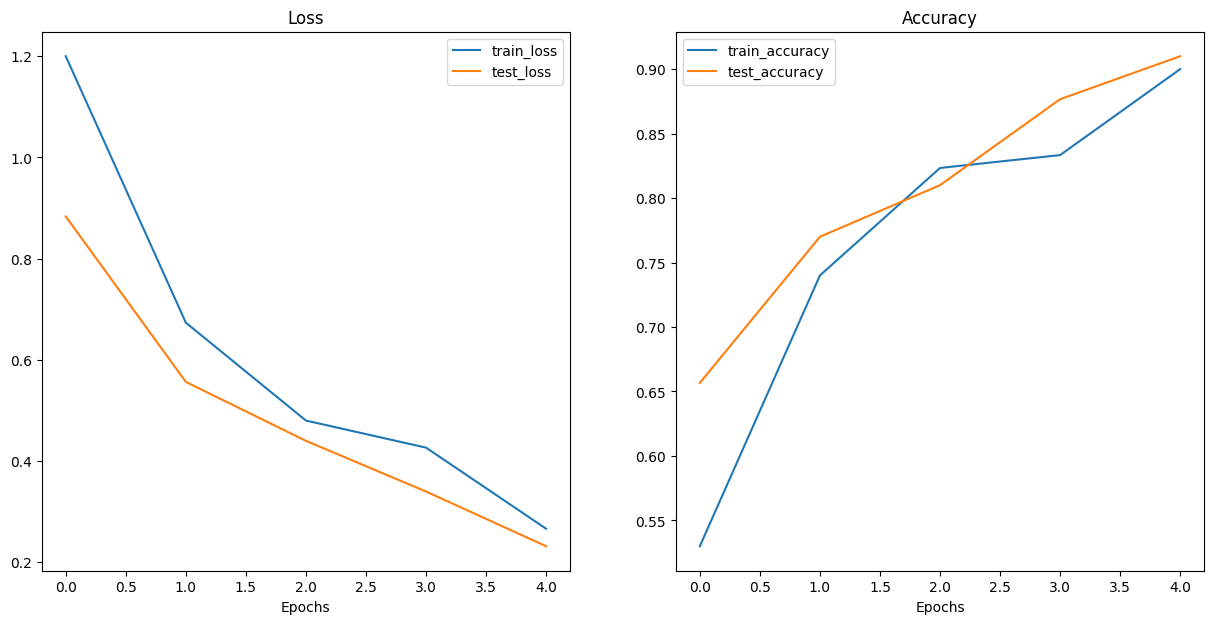

In [205]:
plot_loss_curves(model_0_results)

In [235]:
torch.manual_seed(42)
image=Path("/content/soil_data/Soil Train/Soil Train")

image1 = list(image.glob("*/*.jpg"))
choice = random.choice(image1)
image3=Image.open(choice)

In [236]:
data_transform1 = transforms.Compose([
    # Resize the images to 64x64
    transforms.Resize(size=(64, 64)),
    # Flip the images randomly on the horizontal
    transforms.RandomHorizontalFlip(p=0.5), # p = probability of flip, 0.5 = 50% chance
    # Turn the image into a torch.Tensor
    transforms.ToTensor() # this also converts all pixel values from 0 to 255 to be between 0.0 and 1.0
])


In [240]:
transform_img = data_transform1(image3)

In [241]:
transform_img.shape

torch.Size([3, 64, 64])

In [243]:

print(choice.parent.name)

Black Soil


In [242]:
model_1 = model_0(transform_img.unsqueeze(0).to(device))

In [249]:
model_1

tensor([[-4.0122,  3.6685,  0.3791, -1.0109]], grad_fn=<AddmmBackward0>)

In [247]:
y_pred_class=torch.argmax(torch.softmax(model_1, dim=1) , dim =1)

In [248]:
y_pred_class

tensor([1])

In [ ]:
class_1 = find

In [250]:
print(os.getcwd())

/content


In [251]:
torch.save(model_0.state_dict() , "model_weights.pth")